In [2]:
%matplotlib inline
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ap_df = pd.read_csv('data_ap_time.csv')
client_df = pd.read_csv('data_client_time.csv')


In [5]:
################################################
#
# Now let's extract a time series from the data frame
# and make our first plot.

print "-------- AP DF ----------"
print ap_df.columns
print ap_df.dtypes

print "-------- Clients DF ----------"
print client_df.columns
print client_df.dtypes


-------- AP DF ----------
Index([u'Unnamed: 0', u'BSSID', u'First time seen', u'Last time seen',
       u'channel', u'Speed', u'Privacy', u'Cipher', u'Authentication',
       u'Power', u'# beacons', u'# IV', u'LAN IP', u'ID-length', u'ESSID',
       u'Key', u'Seconds Elapsed'],
      dtype='object')
Unnamed: 0           int64
BSSID               object
First time seen     object
Last time seen      object
channel              int64
Speed                int64
Privacy             object
Cipher              object
Authentication      object
Power                int64
# beacons            int64
# IV                 int64
LAN IP              object
ID-length            int64
ESSID               object
Key                float64
Seconds Elapsed    float64
dtype: object
-------- Clients DF ----------
Index([u'Unnamed: 0', u'Station MAC', u'First time seen', u'Last time seen',
       u'Power', u'# packets', u'BSSID', u'Probed ESSIDs', u'Seconds Elapsed'],
      dtype='object')
Unnamed: 0      

In [6]:
# list of unique macs
unique_macs = np.concatenate([ ap_df['BSSID'].unique() , client_df['Station MAC'].unique() ])


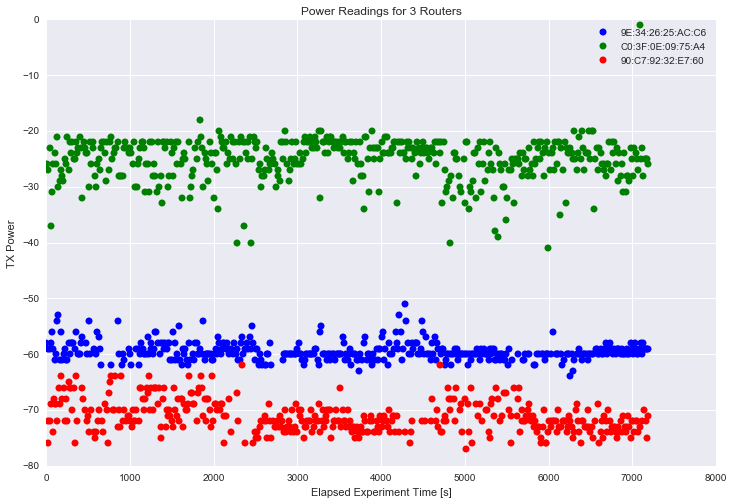

In [7]:
mac1 = unique_macs[14]
mac2 = unique_macs[36]
mac3 = unique_macs[1]
macs = [mac1,mac2,mac3]

colors=['bo','go','ro']

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

for mac,cc in zip(macs,colors):
    xx = ap_df[ap_df['BSSID']==mac]['Seconds Elapsed']
    yy = ap_df[ap_df['BSSID']==mac]['Power']
    ax.plot(xx,yy,cc,label=mac)
ax.legend()
ax.set_title("Power Readings for 3 Routers")
ax.set_xlabel('Elapsed Experiment Time [s]')
ax.set_ylabel('TX Power')
plt.show()

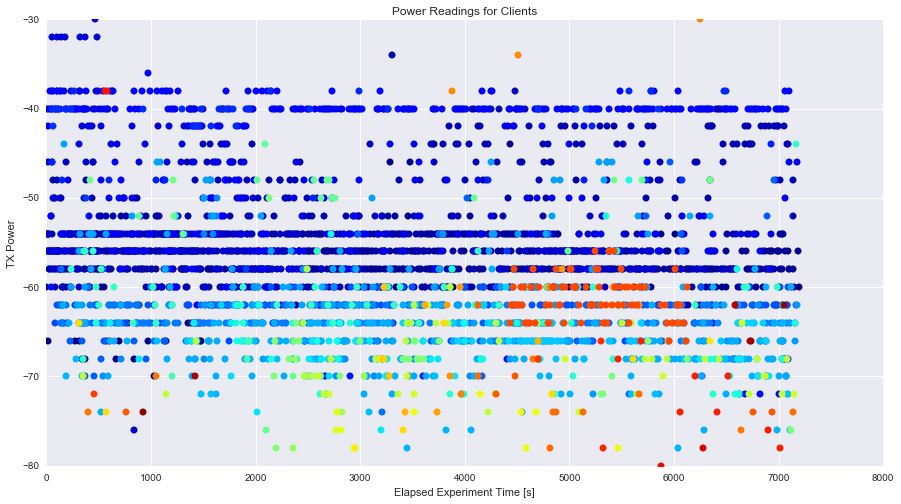

In [8]:
fig2 = plt.figure(figsize=(15,8))
ax2 = fig2.add_subplot(111)

client_macs = client_df['Station MAC'].unique()
color_idx = np.linspace(0,1,len(client_macs))

for i,mac in enumerate(client_macs):
    xx = client_df[client_df['Station MAC']==mac]['Seconds Elapsed']
    yy = client_df[client_df['Station MAC']==mac]['Power']
    xx = xx[yy < -10] 
    yy2 = yy[yy < -10]

    ci = color_idx[i]
    ax2.plot(xx,yy2,'o',color=plt.cm.jet(ci),label=mac)

ax2.set_title("Power Readings for Clients")
ax2.set_xlabel('Elapsed Experiment Time [s]')
ax2.set_ylabel('TX Power')
#ax2.legend()
plt.show()


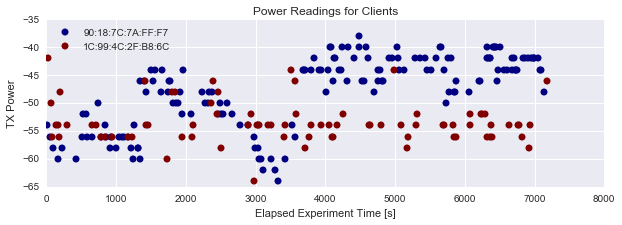

In [9]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

interesting_macs = [client_macs[5],client_macs[10]]
color_idx = np.linspace(0,1,len(interesting_macs))

for i,mac in enumerate(interesting_macs):
    xx = client_df[client_df['Station MAC']==mac]['Seconds Elapsed']
    yy = client_df[client_df['Station MAC']==mac]['Power']
    xx = xx[yy < -10] 
    yy2 = yy[yy < -10]

    ci = color_idx[i]
    ax.plot(xx,yy2,'o',color=plt.cm.jet(ci),label=mac)

ax.set_title("Power Readings for Clients")
ax.set_xlabel('Elapsed Experiment Time [s]')
ax.set_ylabel('TX Power')
ax.legend(loc='best')
plt.show()


power readings for 90:18:7C:7A:FF:F7 and 1C:99:4C:2F:B8:6C


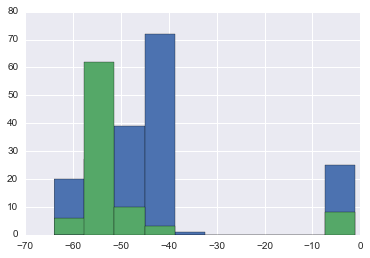

In [10]:
# make a quick histogram of the power readings for a particular mac address
print("power readings for %s and %s"%(client_macs[5],client_macs[10]))

for i,mac in enumerate(interesting_macs):
    client_df[client_df['Station MAC']==mac]['Power'].hist()

#client_df[client_df['Station MAC']client_macs[5]]['Power'].hist()

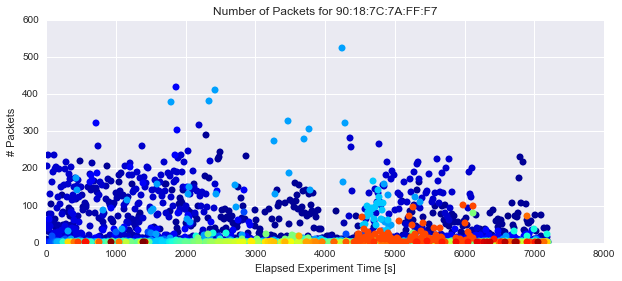

In [11]:
fig2 = plt.figure(figsize=(10,4))
ax2 = fig2.add_subplot(111)

n = 5
client_macs = client_df['Station MAC'].unique()
color_idx = np.linspace(0,1, len(client_macs))

for i,mac in enumerate(client_macs):
    xx = client_df[client_df['Station MAC']==mac]['Seconds Elapsed']
    yy = client_df[client_df['Station MAC']==mac]['# packets']

    ci = color_idx[i]
    ax2.plot(xx,yy,'o',color=plt.cm.jet(ci),label=mac)

ax2.set_title("Number of Packets for %s"%(client_macs[n]))
ax2.set_xlabel('Elapsed Experiment Time [s]')
ax2.set_ylabel('# Packets')
plt.show()


histogram of number of packets per 15 seconds for 90:18:7C:7A:FF:F7


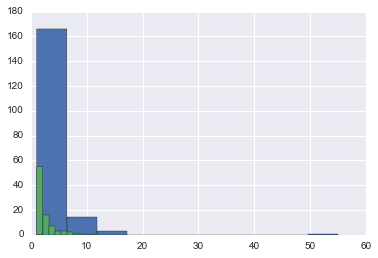

In [15]:
print("histogram of number of packets per 15 seconds for %s"%(client_macs[5]))

for i,mac in enumerate(interesting_macs):
    client_df[client_df['Station MAC']==mac]['# packets'].hist()
